![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Line detection based on Hough Transform

Example taken from this
[Colab](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_04b_hough_transform/hough_transform.ipynb)

In [ ]:
!wget https://www.dropbox.com/s/er4la3rw8vp1d16/edge_bold.png

--2023-11-08 18:11:06--  https://www.dropbox.com/s/er4la3rw8vp1d16/edge_bold.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/er4la3rw8vp1d16/edge_bold.png [following]
--2023-11-08 18:11:06--  https://www.dropbox.com/s/raw/er4la3rw8vp1d16/edge_bold.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4e67945d465ff0c8c8b193cbf6.dl.dropboxusercontent.com/cd/0/inline/CHLkDXxYtHxy7B4lLb1X-zoOpOC0mN6J-z8CZhXK7LuAFnw-BPpbIQHdqWFbB8v4_jgd6QPY-u-d8LZhqIvImF2lfapLehjAqJUvArWTn9IIcEi8srhG1J8RWLCNAdBNFXo/file# [following]
--2023-11-08 18:11:07--  https://uc4e67945d465ff0c8c8b193cbf6.dl.dropboxusercontent.com/cd/0/inline/CHLkDXxYtHxy7B4lLb1X-zoOpOC0mN6J-z8CZhXK7LuAFnw-BPpbIQHdqWFbB8v4_jgd6QPY-u-d8LZhqIvImF2lfapLehjAqJUvArWTn9IIcEi8srhG1J8R

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

figsize = (10, 10)



## Import an image


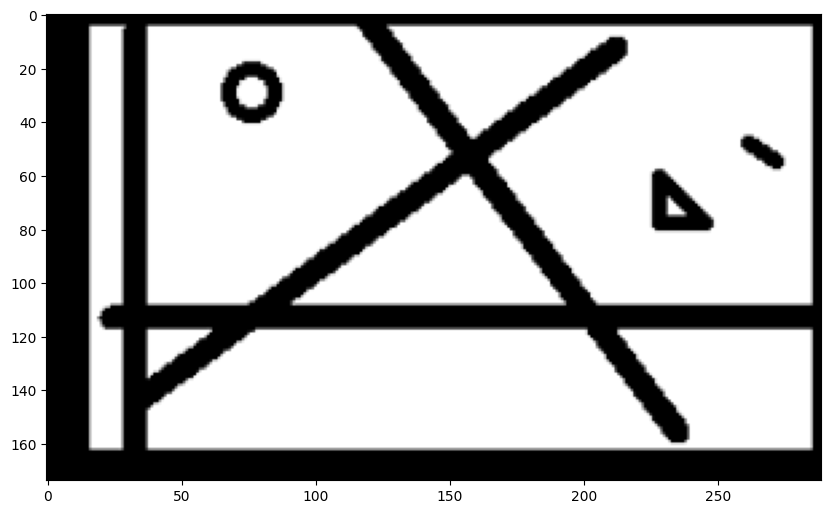

In [ ]:
im3 = cv2.imread("edge_bold.png")
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.show()



## Find edges of an image using Canny
For more details about Canny edge detection


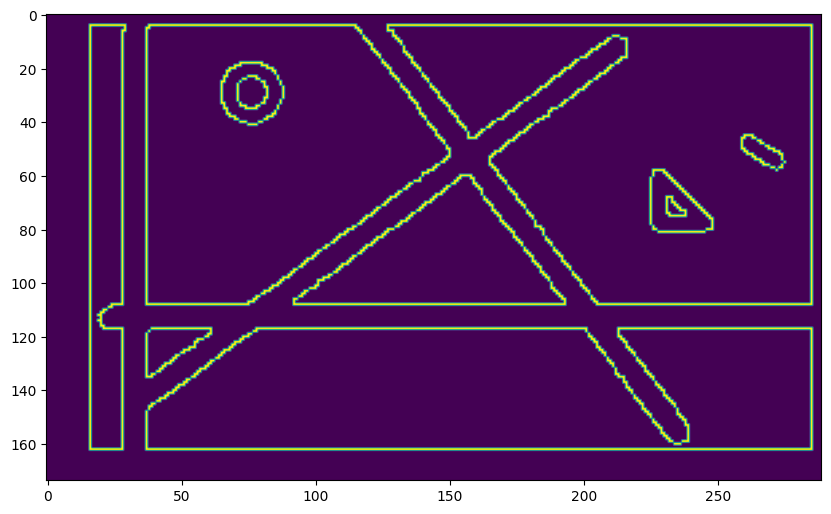

In [ ]:
mag_im = cv2.Canny(im, 50, 400)

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()



## Initialize accumulation matrix


In [ ]:
# choose R size
r_step = 1
rmax = np.sqrt(im.shape[0] ** 2 + im.shape[1] ** 2)
r_vec = np.arange(-rmax, rmax, r_step)

# choose theta size
t_step = np.pi / 180
t_vec = np.arange(0, np.pi, t_step)

# accumulation matrix
acc_mat = np.zeros((r_vec.shape[0], t_vec.shape[0]))



## Fill accumulation matrix


In [ ]:
# get indices of edges
edge_inds = np.argwhere(mag_im > 0)

# run on all theta and edge indices and find corresponding R
for t_ind, t0 in enumerate(t_vec):
    for yx in edge_inds:
        x = yx[1]
        y = yx[0]

        r0 = x * np.cos(t0) + y * np.sin(t0)
        r_ind = np.argmin(np.abs(r0 - r_vec))

        acc_mat[r_ind, t_ind] += 1



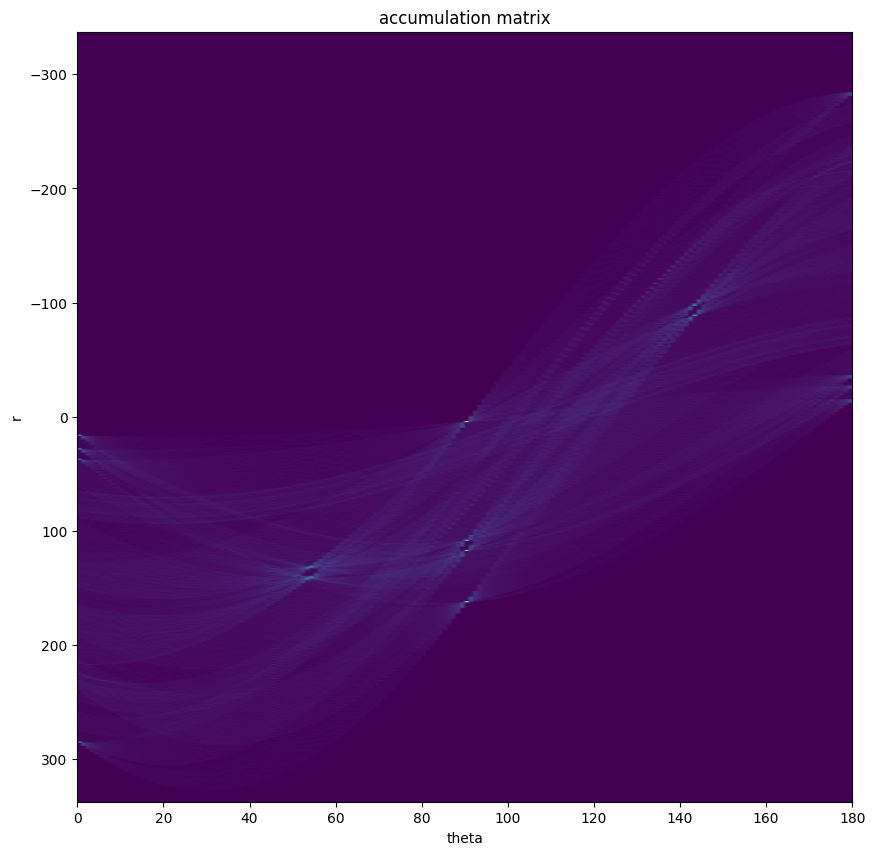

In [ ]:
plt.figure(figsize=figsize)
plt.imshow(acc_mat, extent=[0, 180, rmax, -rmax], aspect="auto")
plt.xlabel("theta")
plt.ylabel("r")
plt.title("accumulation matrix")
plt.show()



## Threshold accumulation matrix


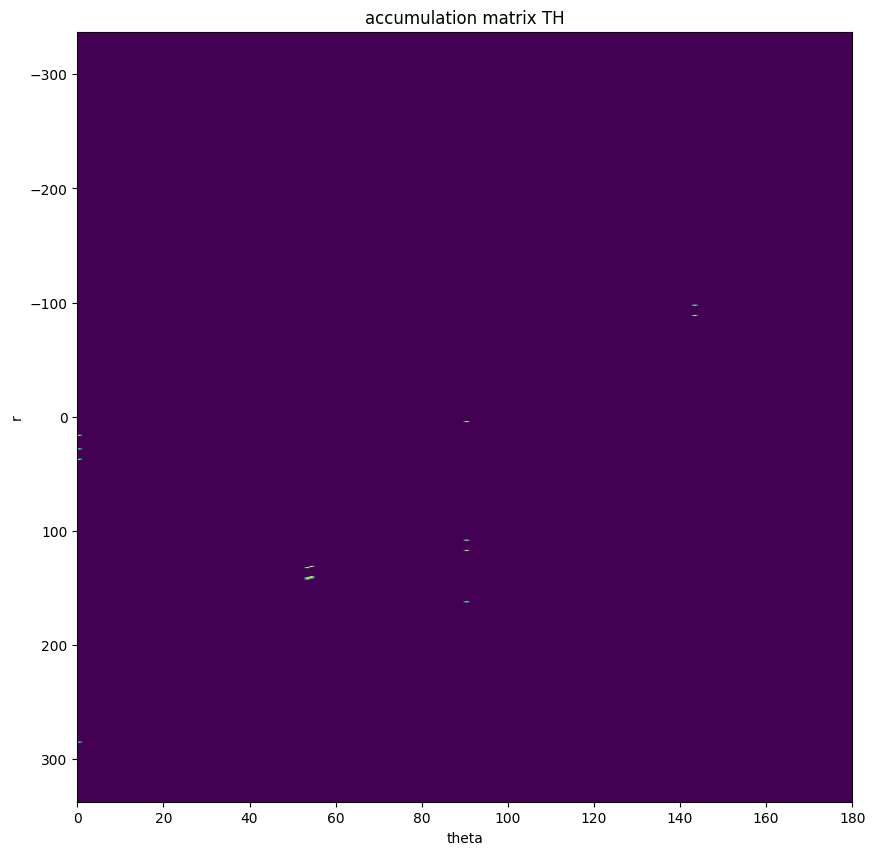

In [ ]:
TH = 100
acc_mat_th = acc_mat > TH

plt.figure(figsize=figsize)
plt.imshow(acc_mat_th, extent=[0, 180, rmax, -rmax], aspect="auto")
plt.xlabel("theta")
plt.ylabel("r")
plt.title("accumulation matrix TH")
plt.show()



## Plot lines found by hough


(rho,theta): (-98.33810932060436, 143.0)
(rho,theta): (-89.33810932060436, 143.0)
(rho,theta): (3.66189067939564, 90.0)
(rho,theta): (15.66189067939564, 0.0)
(rho,theta): (27.66189067939564, 0.0)
(rho,theta): (36.66189067939564, 0.0)
(rho,theta): (107.66189067939564, 90.0)
(rho,theta): (116.66189067939564, 90.0)
(rho,theta): (130.66189067939564, 54.0)
(rho,theta): (131.66189067939564, 53.0)
(rho,theta): (139.66189067939564, 54.0)
(rho,theta): (140.66189067939564, 53.0)
(rho,theta): (140.66189067939564, 54.0)
(rho,theta): (141.66189067939564, 53.0)
(rho,theta): (161.66189067939564, 90.0)
(rho,theta): (284.66189067939564, 0.0)


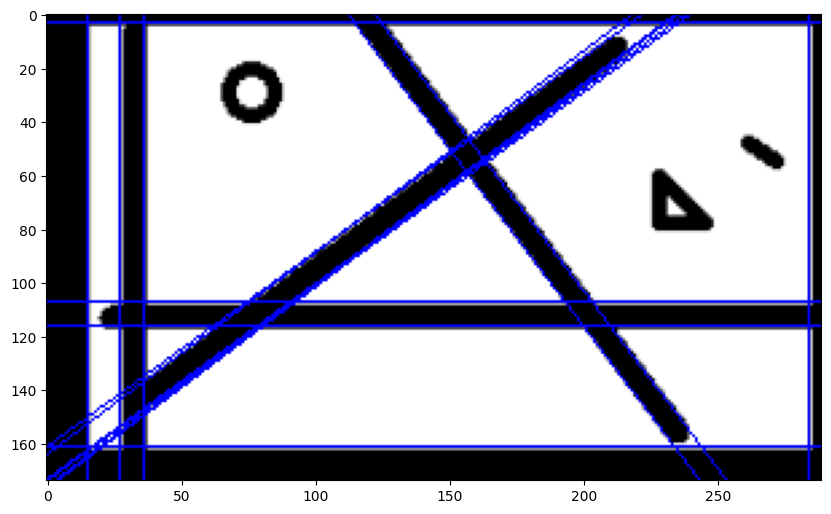

In [ ]:
# get indices of acc_mat_th
edge_inds = np.argwhere(acc_mat_th > 0)

res = im3.copy()
for r_ind, t_ind in edge_inds:
    rho = r_vec[r_ind]
    theta = t_vec[t_ind]

    print("(rho,theta): " + str((rho, theta / np.pi * 180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()



## Try cv2.HoughLines
This implementation is faster since it was done in C


(rho,theta): (162.0, 90.00000250447816)
(rho,theta): (4.0, 90.00000250447816)
(rho,theta): (117.0, 90.00000250447816)
(rho,theta): (108.0, 90.00000250447816)
(rho,theta): (16.0, 0.0)
(rho,theta): (285.0, 0.0)
(rho,theta): (28.0, 0.0)
(rho,theta): (131.0, 53.99999808759232)
(rho,theta): (140.0, 53.99999808759232)
(rho,theta): (-99.0, 142.9999960107835)
(rho,theta): (37.0, 0.0)
(rho,theta): (-90.0, 142.9999960107835)
(rho,theta): (132.0, 53.0000003364945)
(rho,theta): (141.0, 53.0000003364945)


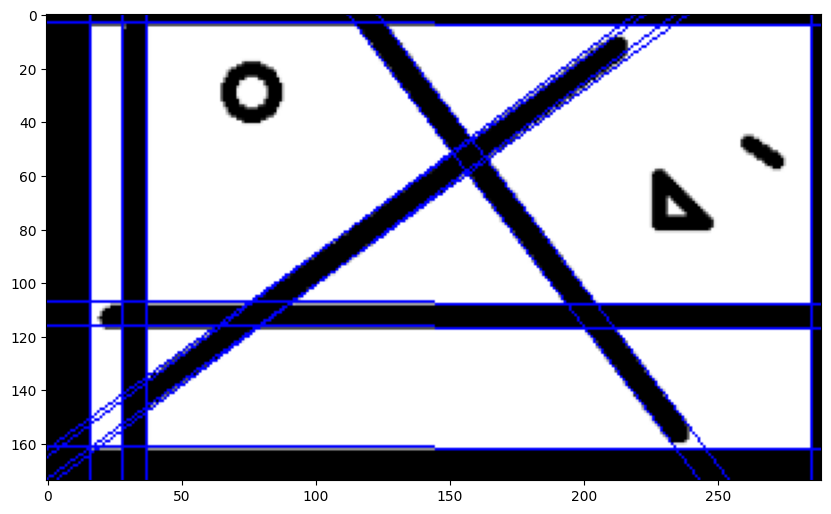

In [ ]:
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    print("(rho,theta): " + str((rho, theta / np.pi * 180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()



## Complete new example of a more complex image
We can see on the bottom horizontal lines that the "noise" of the tree top edges is interfeering with the line detection.


In [ ]:
!wget https://www.dropbox.com/s/4dwmepxgi4nhd7g/building.png

--2023-11-08 18:11:18--  https://www.dropbox.com/s/4dwmepxgi4nhd7g/building.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4dwmepxgi4nhd7g/building.png [following]
--2023-11-08 18:11:19--  https://www.dropbox.com/s/raw/4dwmepxgi4nhd7g/building.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30d0485b62cb1a9373a0eab563.dl.dropboxusercontent.com/cd/0/inline/CHL4wVIiq0mIDYVnO7hspdVl2adDseYIRdl22po1kVvXeJhOQY8QFNNXq_LdcGZv-6TbUKOdc8fvTTYdBwLFK7Qle3u0TanFQhXkgHHxjJQQShjbUAlUGk9wr1w1Vl8RdRg/file# [following]
--2023-11-08 18:11:19--  https://uc30d0485b62cb1a9373a0eab563.dl.dropboxusercontent.com/cd/0/inline/CHL4wVIiq0mIDYVnO7hspdVl2adDseYIRdl22po1kVvXeJhOQY8QFNNXq_LdcGZv-6TbUKOdc8fvTTYdBwLFK7Qle3u0TanFQhXkgHHxjJQQShjbUAlUGk9wr1w

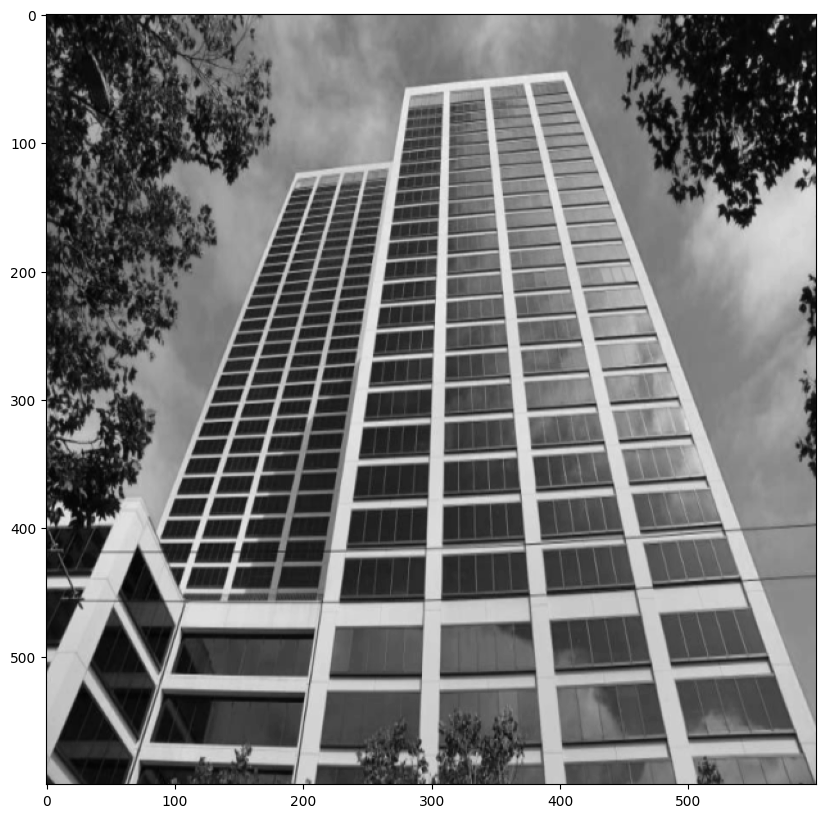

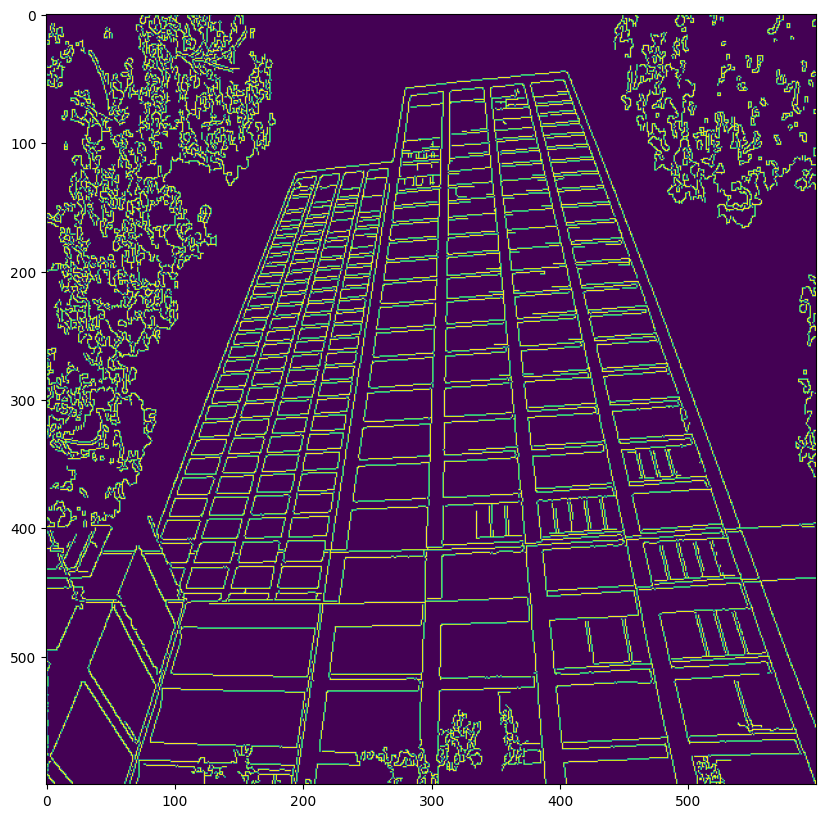

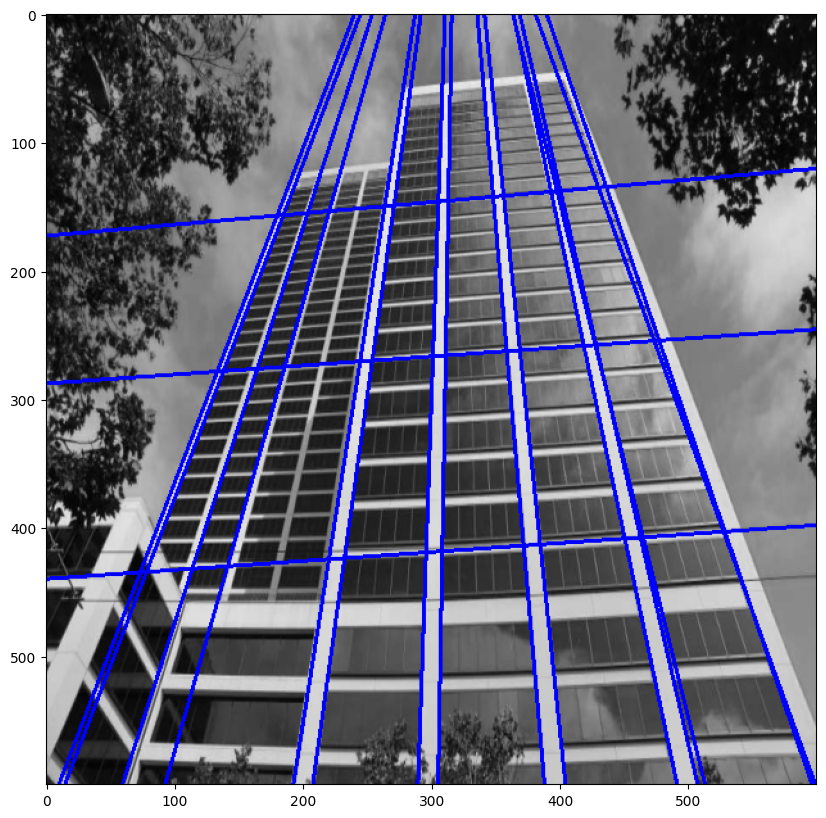

In [ ]:
im3 = cv2.imread("building.png")
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im3 = cv2.resize(im3,(600,600))

im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.show()

mag_im = cv2.Canny(im, 50, 400)

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()

TH = 200
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=2)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()

